# Explanatory Analysis of Lyft Bay Wheels Data

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.

It was established as Bay Area Bike Share in August 2013. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.

In this project I will analyse Bay Wheels data from January 2020.

### Assessing and preparing the dataset

In [153]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [154]:
# import and view dataset
data_frame = pd.read_csv('202001-baywheels-tripdata.csv')
data_frame.head()

C:\Users\zech011\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [155]:
df = data_frame.copy()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             295854 non-null  int64  
 1   start_time               295854 non-null  object 
 2   end_time                 295854 non-null  object 
 3   start_station_id         146286 non-null  float64
 4   start_station_name       146866 non-null  object 
 5   start_station_latitude   295854 non-null  float64
 6   start_station_longitude  295854 non-null  float64
 7   end_station_id           145934 non-null  float64
 8   end_station_name         146511 non-null  object 
 9   end_station_latitude     295854 non-null  float64
 10  end_station_longitude    295854 non-null  float64
 11  bike_id                  295854 non-null  int64  
 12  user_type                295854 non-null  object 
 13  rental_access_method     185746 non-null  object 
dtypes: f

In [157]:
# convert date strings to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             295854 non-null  int64         
 1   start_time               295854 non-null  datetime64[ns]
 2   end_time                 295854 non-null  datetime64[ns]
 3   start_station_id         146286 non-null  float64       
 4   start_station_name       146866 non-null  object        
 5   start_station_latitude   295854 non-null  float64       
 6   start_station_longitude  295854 non-null  float64       
 7   end_station_id           145934 non-null  float64       
 8   end_station_name         146511 non-null  object        
 9   end_station_latitude     295854 non-null  float64       
 10  end_station_longitude    295854 non-null  float64       
 11  bike_id                  295854 non-null  int64         
 12  user_type       

In [158]:
df.shape

(295854, 14)

In [159]:
df.rental_access_method.value_counts()

app        171751
clipper     13995
Name: rental_access_method, dtype: int64

In [160]:
# create columns for day and time
df['start_day'] = pd.DatetimeIndex(df.start_time).day
df['end_day'] = pd.DatetimeIndex(df.end_time).day

df['start_hour'] = df.start_time.dt.hour
df['end_hour'] = df.end_time.dt.hour

# create columns for day of the week
df['dayofweek'] = df.start_time.dt.dayofweek

# test
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_day,end_day,start_hour,end_hour,dayofweek
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,31,1,15,14,4
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN,31,1,15,10,4
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,31,1,17,9,4
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,31,1,17,9,4
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,31,1,17,8,4


In [161]:
# create columns for duration in minutes and hours
df['duration_min'] = df.duration_sec / 60
df['duration_hour'] = df.duration_min / 60

In [162]:
# create column that says whether the bike 
# was dropped at the same location it was picked up from

# create column
df['same_drop_station'] = 1

# set True if same location and False if different
df.loc[(df.start_station_name == df.end_station_name), 'same_drop_station'] = True
df.loc[(df.start_station_name != df.end_station_name), 'same_drop_station'] = False

# test
df.same_drop_station.value_counts()

False    292284
True       3570
Name: same_drop_station, dtype: int64

In [163]:
# create column that defines if the pickup day was a weekday or not

# list of weekend days in January 2020
weekends = [4,5,11,12,18,19,25,26]

# create column
df['weekday'] = 1

# set True if not in weekends list and False if it is
df.loc[(df.start_day.isin(weekends)), 'weekday'] = False
df.loc[~(df.start_day.isin(weekends)), 'weekday'] = True

df.weekday.value_counts()

True     241936
False     53918
Name: weekday, dtype: int64

In [164]:
# get names for weekdays with Monday=0, Sunday=6.
mapper = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['dayofweek'] = df['dayofweek'].map(mapper)

# order them
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek'] = df['dayofweek'].astype(ordered_cat)

#test
print(df['dayofweek'].value_counts())

Friday       56258
Wednesday    52737
Thursday     51284
Tuesday      41967
Monday       39690
Saturday     28496
Sunday       25422
Name: dayofweek, dtype: int64


In [165]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_day,end_day,start_hour,end_hour,duration_min,duration_hour
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000,295854.000000,295854.000000,295854.000000,295854.000000,295854.000000,295854.000000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539,18.722150,18.717479,13.568017,13.730228,13.007887,0.216798
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534,8.738716,8.740710,4.751850,4.775549,33.963105,0.566052
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513847,12.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.016667
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000,11.000000,11.000000,9.000000,9.000000,6.150000,0.102500
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000,20.000000,20.000000,14.000000,14.000000,9.800000,0.163333
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000,27.000000,27.000000,17.000000,18.000000,15.200000,0.253333
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000,31.000000,31.000000,23.000000,23.000000,13517.950000,225.299167


In [166]:
df.to_csv('202001-baywheels-tripdata_cleaned.csv', index=False)

## Exploratory analysis

Variables to use:

Numeric variables
- duration_sec
- duration_min
- start_time
- start_day
- start_hour


Categorical variables
- rental_access_method (app or clipper)
- user_type (Customer or Subscriber)
- same_drop_station (True or False)
- weekday
- dayofweek

### Univariate analyses

First, let's see the distribution of ride durations

mode is 394


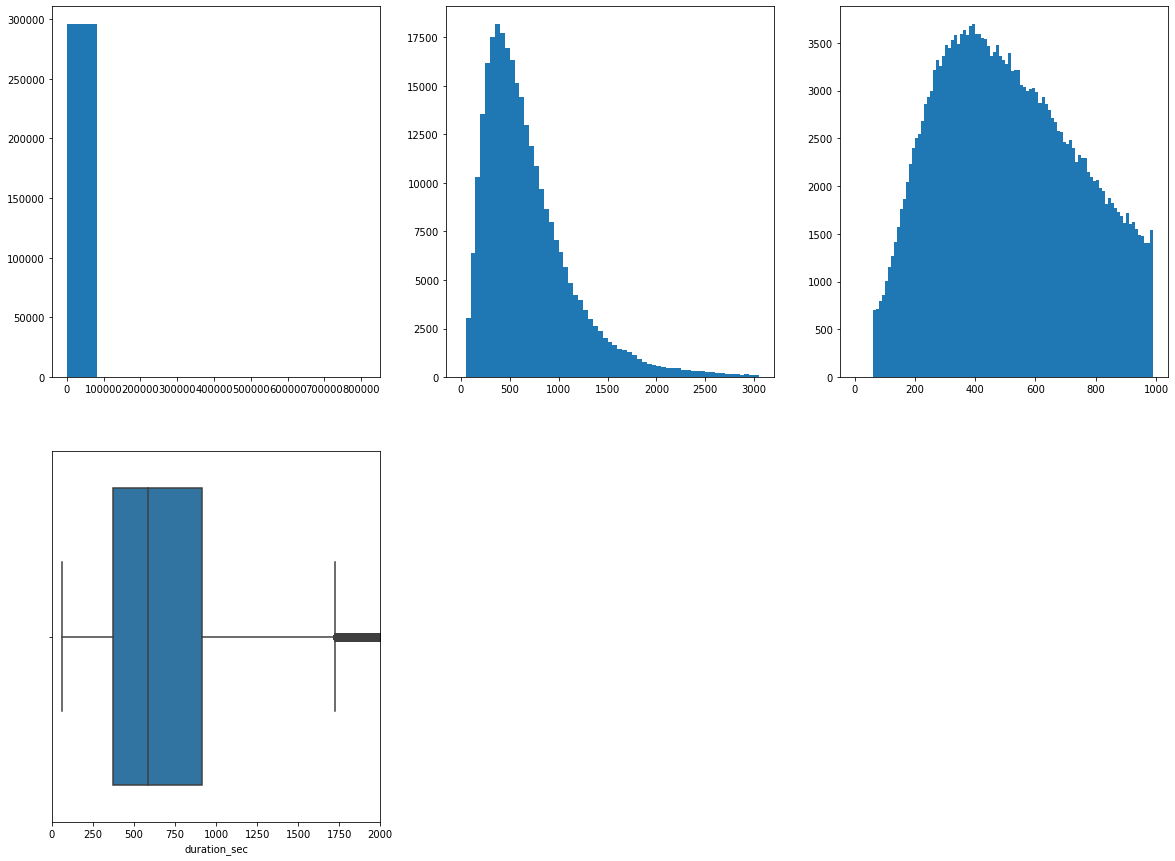

In [167]:
# plot histogram of duration of rides

plt.figure(figsize = [20,15])

# histogram without adjusting for outliers
plt.subplot(2,3,1)

plt.hist(data=df, x='duration_sec');

# histogram leaving outliers out
plt.subplot(2,3,2)

bin_edges = np.arange(0, 3000+100, 50)

plt.hist(data=df, x='duration_sec', bins=bin_edges);

# histogram focusing on the mode
plt.subplot(2,3,3)

bin_edges_2 = np.arange(0, 1000, 10)

plt.hist(data=df, x='duration_sec', bins=bin_edges_2);

# boxplot
plt.subplot(2,3,4)
sb.boxplot(x=df.duration_sec)
plt.xlim(0,2000)


# print the mode of the series
print('mode is ' + str(df.duration_sec.mode()[0]))

The distribution is rightly skewed, so let's create a log version of it

Text(0.5, 0, 'log(values)')

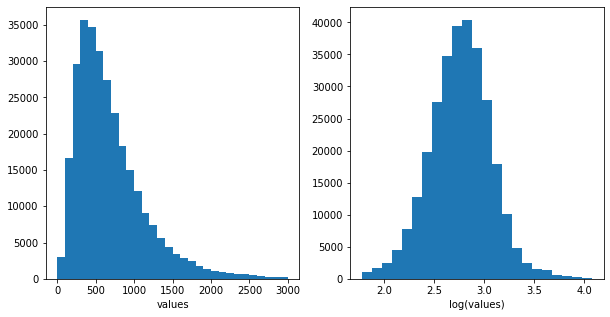

In [168]:
# create histogram of duration_sec as log

plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, 3000+100, 100)
plt.hist(df.duration_sec, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_duration = np.log10(df.duration_sec) # direct data transform
log_bin_edges = np.arange(log_duration.min(), 4+0.1, 0.1)
plt.hist(log_duration, bins = log_bin_edges)
plt.xlabel('log(values)')


Finding: The distribution is clearly skewed to the right with a long tail. Most trips fall around the 400 seconds.

Now let's see how the distribution of rides looks like according to day of the month

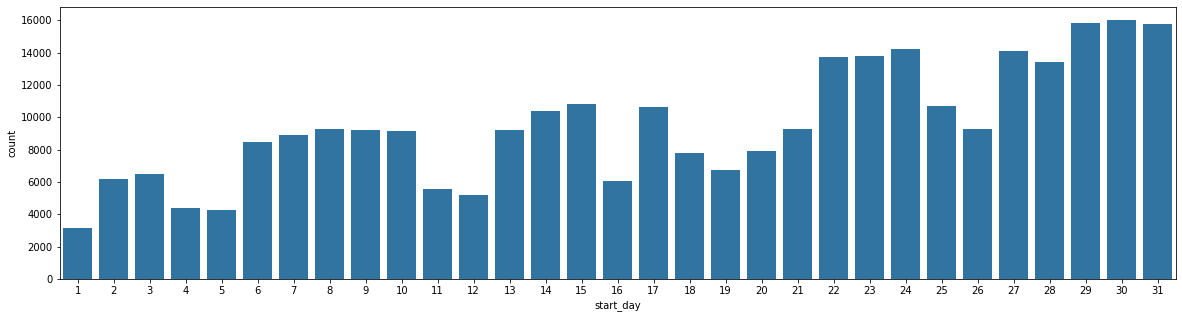

In [170]:
# plot bar chart of usage count according to day of the month
plt.figure(figsize = [20, 5])

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color);

Bike usage seems to be increasing acording to day of the month - maybe because of vacations (this is data from January).

What about hour of the day?

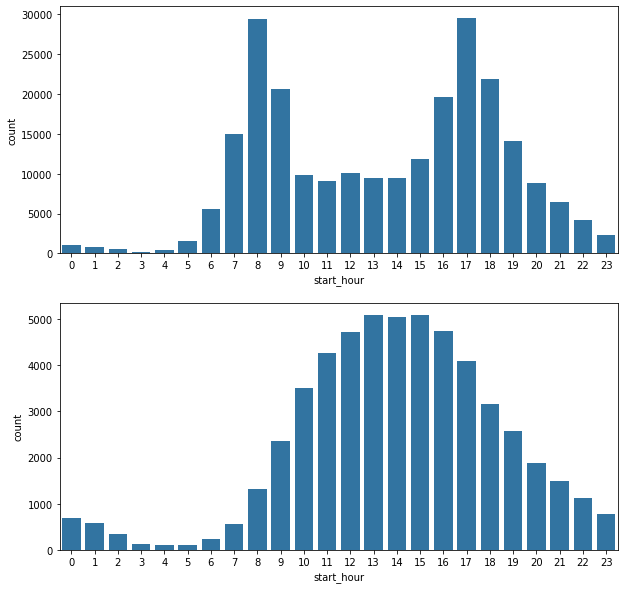

In [171]:
# plot bar charts of usage count according to hour of the day
plt.figure(figsize = [10, 10])

# get dataframe for weekdays only and plot it
df_weekdays = df[df.weekday == True]

plt.subplot(2,1,1)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekdays, x='start_hour', color=base_color);

# get dataframe for weekends only and plot it
df_weekends = df[df.weekday == False]

plt.subplot(2,1,2)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekends, x='start_hour', color=base_color);

During weekdays: We can see here a bimodal distribution with peaks at 8h and 17h since that is the time people usually go to and leave work.

During weekends: we don't see this bimodal distribution since people are not working so we can see more of a normal distribution with the peak being after lunch

Next, let's check the distribution according to the categorical variables

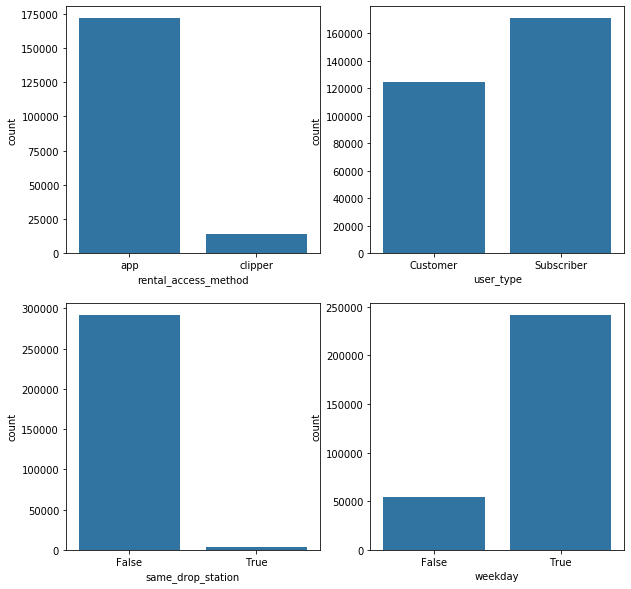

In [172]:
# plot the categorical variables

plt.figure(figsize = [10,10])

# plot for rental_access_method
plt.subplot(2,2,1)

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='rental_access_method', color=base_color);

# plot for user_type
plt.subplot(2,2,2)

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);

# plot for same_drop_station
plt.subplot(2,2,3)

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='same_drop_station', color=base_color);

# plot for weekday
plt.subplot(2,2,4)

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='weekday', color=base_color);

App, Subscriber, different drop station ane weekdays are the most common attributes in their categories

### Bivariate analyses

Let's see that same graph of ride count per day of the month but now account for weekends and weekdays

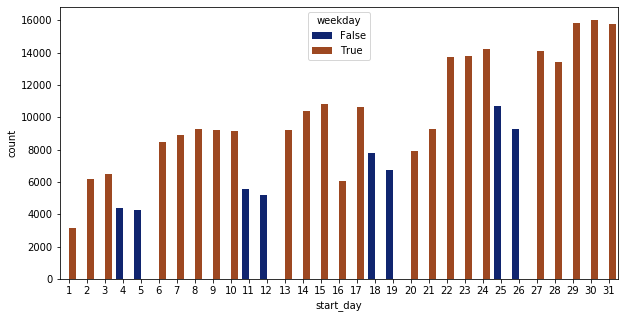

In [173]:
# plot usage count according to day of the month accounting for weekdays/weekend
plt.figure(figsize = [10, 5])

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color, hue='weekday', palette='dark');

Diferentiating between weekends and weekdays clearly shows that bike usage tends to fall on weekends

Let's see how the distribution of ride durations within those days looks like

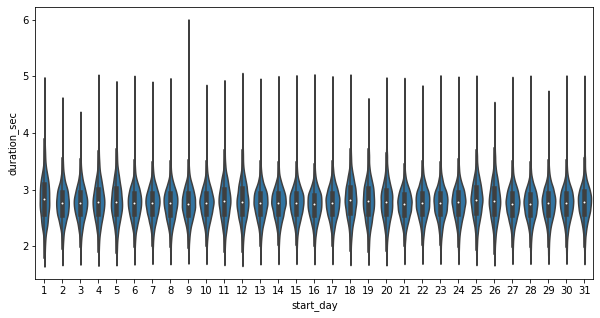

In [174]:
# plot log of duration according to day of the month
plt.figure(figsize = [10, 5])

sb.violinplot(data = df, x = 'start_day', y = log_duration, color = base_color)
#plt.ylim(0,50);

They all seem to be fairly similar

Let's separate between weekday and weekends only now

(1.7781512503836436, 4)

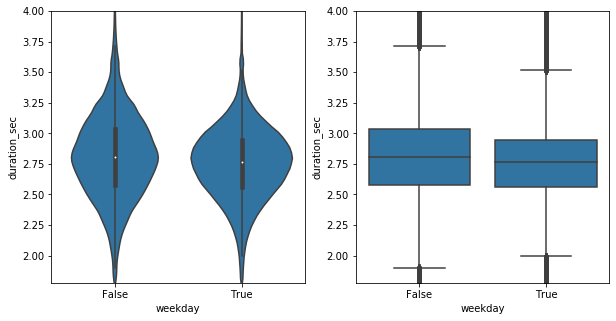

In [175]:
# plot duration against weekday/weekend

plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'weekday', y = log_duration, color = base_color)
plt.ylim(log_duration.min(),4)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'weekday', y = log_duration, color = base_color)
plt.ylim(log_duration.min(),4)

it seems like ride durations are longer during weekends. Let's try to confirm this

In [209]:
# extract averages
df_weekday_means = df.groupby('weekday').mean()
df_weekday_means = df_weekday_means.duration_sec.reset_index(name='avg_duration')
df_weekday_means

,weekday,avg_duration
0,False,927.439352
1,True,747.720228


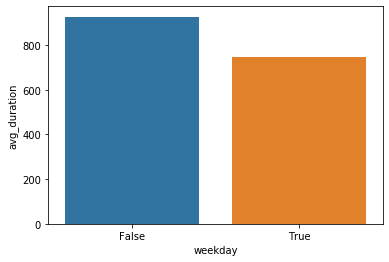

In [177]:
# plot the averages
sb.barplot(data=df_weekday_means, x='weekday', y='avg_duration')

Yes, ride durations are longer during weekends even though less people ride bikes on weekends

### Multivariate analyses

Let's see the difference between ride duration across user types for each day of the week

C:\Users\zech011\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


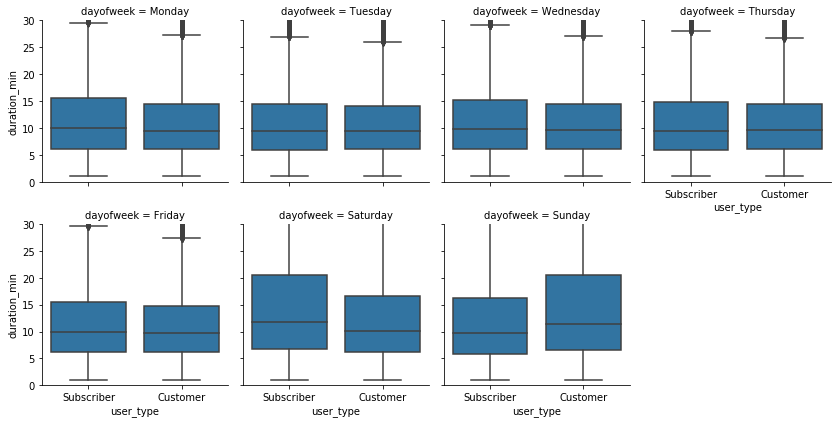

In [178]:
# plot boxplots of user_type vs duration for each day of the week
g = sb.FacetGrid(data = df, col = 'dayofweek', col_wrap=4)
g.map(sb.boxplot, 'user_type', 'duration_min')
plt.ylim(0,30);


During the week there does not seem to be so much of a difference between both user types, only on weekends.

Let's take a look at average bike durations now

In [179]:
# get dataframe with average ride duration for dayofweek vs. user_type
df_means = df.groupby(['user_type', 'dayofweek'])['duration_min'].mean()
df_means = df_means.unstack(level=0)
df_means

user_type,Customer,Subscriber
dayofweek,,
Monday,14.199789,11.795601
Tuesday,12.838736,11.227875
Wednesday,13.319249,11.642157
Thursday,12.866360,12.024341
Friday,13.671883,12.142502
Saturday,19.057124,13.387186
Sunday,17.939332,13.099487


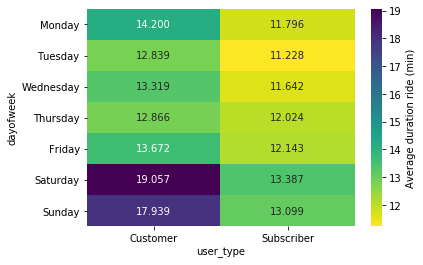

In [180]:
#plot heatmap
sb.heatmap(df_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average duration ride (min)'}, cmap = 'viridis_r');

'Customers' appear to ride longer than 'Subscribers', even though there are more Subsribers than Customers. Also, everyone rides longer on weekends.

Now let's aggregate weekdays and take a closer look at count of rides for these

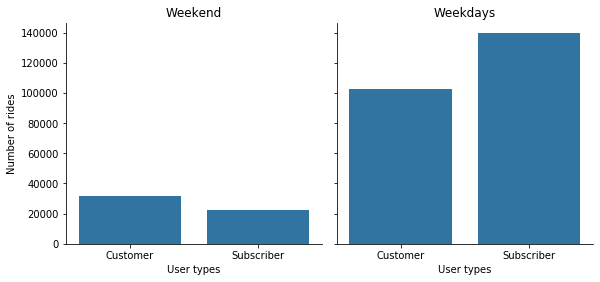

In [202]:
# plot count of rides according to customer and weekday/weekend
g = sb.FacetGrid(data = df, col = 'weekday', size = 4, col_wrap=3)
g.map(sb.countplot, 'user_type')

axes = g.axes.flatten()
axes[0].set_title("Weekend")
axes[1].set_title("Weekdays")

axes = g.axes.flatten()
axes[0].set_ylabel("Number of rides")
for ax in axes:
    ax.set_xlabel("User types");


Since there are more users of the Customer type on Weekends, and in Weekends everyone tends to ride longer, that is probably why Customers ride longer on Weekends.

Finally let's see if there is a major difference in usage patterns across hours of the day

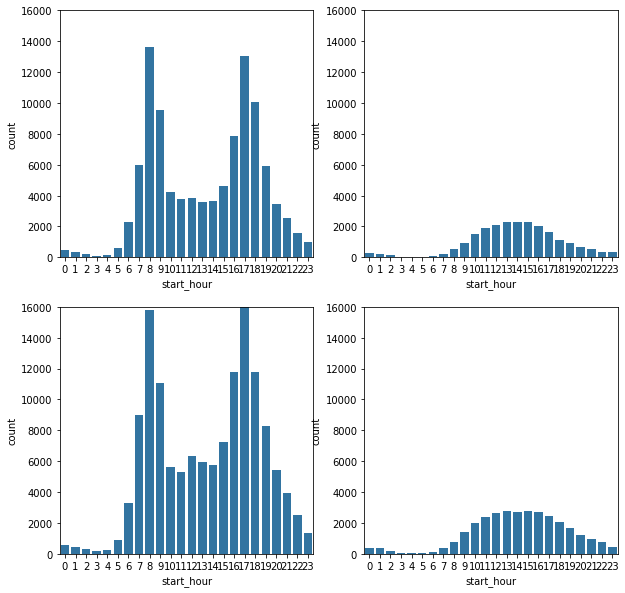

In [194]:

# plot bar charts of usage count according to hour of the day
# differentiate between customers and subscribers
plt.figure(figsize = [10, 10])

# create dataframes
df_weekdays_customer = df[(df.weekday == True) & (df.user_type == 'Customer')]
df_weekends_customer = df[(df.weekday == False) & (df.user_type == 'Customer')]


df_weekdays_subscriber = df[(df.weekday == True) & (df.user_type == 'Subscriber')]
df_weekends_subscriber = df[(df.weekday == False) & (df.user_type == 'Subscriber')]

# get dataframes for customers only and plot it
plt.subplot(2,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekdays_customer, x='start_hour', color=base_color);
plt.ylim(0, 16000);

plt.subplot(2,2,2)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekends_customer, x='start_hour', color=base_color)
plt.ylim(0, 16000);


# get dataframes for subscribers only and plot it
plt.subplot(2,2,3)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekdays_subscriber, x='start_hour', color=base_color)
plt.ylim(0, 16000);

plt.subplot(2,2,4)
base_color = sb.color_palette()[0]
sb.countplot(data=df_weekends_subscriber, x='start_hour', color=base_color)
plt.ylim(0, 16000);

There is not much difference in usage patterns across both groups